'data.frame':	1232 obs. of  15 variables:
 $ Team        : Factor w/ 39 levels "ANA","ARI","ATL",..: 2 3 4 5 7 8 9 10 11 12 ...
 $ League      : Factor w/ 2 levels "AL","NL": 2 2 1 1 2 1 2 1 2 1 ...
 $ Year        : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ RS          : int  734 700 712 734 613 748 669 667 758 726 ...
 $ RA          : int  688 600 705 806 759 676 588 845 890 670 ...
 $ W           : int  81 94 93 69 61 85 97 68 64 88 ...
 $ OBP         : num  0.328 0.32 0.311 0.315 0.302 0.318 0.315 0.324 0.33 0.335 ...
 $ SLG         : num  0.418 0.389 0.417 0.415 0.378 0.422 0.411 0.381 0.436 0.422 ...
 $ BA          : num  0.259 0.247 0.247 0.26 0.24 0.255 0.251 0.251 0.274 0.268 ...
 $ Playoffs    : int  0 1 1 0 0 0 1 0 0 1 ...
 $ RankSeason  : int  NA 4 5 NA NA NA 2 NA NA 6 ...
 $ RankPlayoffs: int  NA 5 4 NA NA NA 4 NA NA 2 ...
 $ G           : int  162 162 162 162 162 162 162 162 162 162 ...
 $ OOBP        : num  0.317 0.306 0.315 0.331 0.335 0.319 0.305 0.3


Call:
lm(formula = W ~ RD, data = moneyball)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2662  -2.6509   0.1234   2.9364  11.6570 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.881375   0.131157  616.67   <2e-16 ***
RD           0.105766   0.001297   81.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.939 on 900 degrees of freedom
Multiple R-squared:  0.8808,	Adjusted R-squared:  0.8807 
F-statistic:  6651 on 1 and 900 DF,  p-value: < 2.2e-16


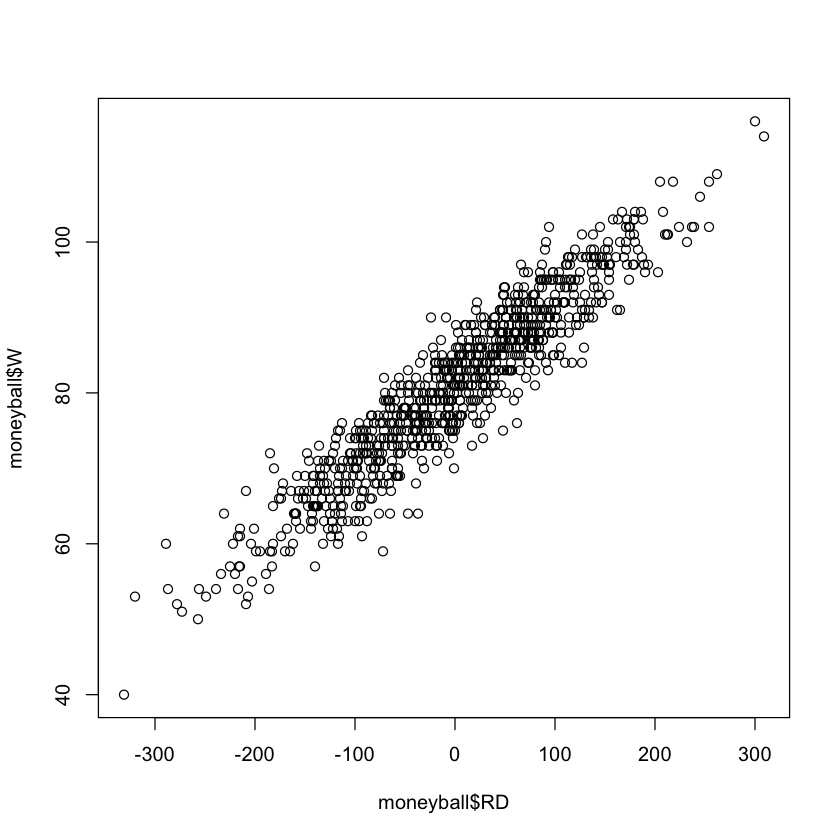

In [1]:
# Read in data
baseball = read.csv("baseball.csv")
str(baseball)

# Subset to only include moneyball years
moneyball = subset(baseball, Year < 2002)
str(moneyball)

# Compute Run Difference
moneyball$RD = moneyball$RS - moneyball$RA
str(moneyball)

# Scatterplot to check for linear relationship
plot(moneyball$RD, moneyball$W)

# Regression model to predict wins
WinsReg = lm(W ~ RD, data=moneyball)
summary(WinsReg)


In [5]:
RD = c(99)
testWin = data.frame(RD)

predict(WinsReg, newdata=testWin)

1 
91.35217

In [6]:
# Regression model to predict runs scored
RunsReg = lm(RS ~ OBP + SLG + BA, data=moneyball)
summary(RunsReg)

RunsReg = lm(RS ~ OBP + SLG, data=moneyball)
summary(RunsReg)



Call:
lm(formula = RS ~ OBP + SLG + BA, data = moneyball)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.941 -17.247  -0.621  16.754  90.998 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -788.46      19.70 -40.029  < 2e-16 ***
OBP          2917.42     110.47  26.410  < 2e-16 ***
SLG          1637.93      45.99  35.612  < 2e-16 ***
BA           -368.97     130.58  -2.826  0.00482 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.69 on 898 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:   0.93 
F-statistic:  3989 on 3 and 898 DF,  p-value: < 2.2e-16



Call:
lm(formula = RS ~ OBP + SLG, data = moneyball)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.838 -17.174  -1.108  16.770  90.036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -804.63      18.92  -42.53   <2e-16 ***
OBP          2737.77      90.68   30.19   <2e-16 ***
SLG          1584.91      42.16   37.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.79 on 899 degrees of freedom
Multiple R-squared:  0.9296,	Adjusted R-squared:  0.9294 
F-statistic:  5934 on 2 and 899 DF,  p-value: < 2.2e-16


In [7]:
OBP = c(0.311)
SLG = c(0.405)
RunsTest = data.frame(OBP, SLG)
predict(RunsReg, newdata=RunsTest)


1 
688.7068

In [11]:
RunAllow = lm(RA ~ OOBP + OSLG, data=moneyball)

In [12]:
summary(RunAllow)

OOBP = c(0.297)
OSLG = c(0.370)
RunAllowTest = data.frame(OOBP, OSLG)
predict(RunAllow, newdata=RunAllowTest)


Call:
lm(formula = RA ~ OOBP + OSLG, data = moneyball)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.397 -15.178  -0.129  17.679  60.955 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -837.38      60.26 -13.897  < 2e-16 ***
OOBP         2913.60     291.97   9.979 4.46e-16 ***
OSLG         1514.29     175.43   8.632 2.55e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.67 on 87 degrees of freedom
  (812 observations deleted due to missingness)
Multiple R-squared:  0.9073,	Adjusted R-squared:  0.9052 
F-statistic: 425.8 on 2 and 87 DF,  p-value: < 2.2e-16


1 
588.247

In [14]:
OBP = c(0.338, 0.391, 0.369, 0.313, 0.361)
SLG = c(0.540, 0.450, 0.374, 0.447, 0.500)
RunsTest2 = data.frame(OBP, SLG)
predict(RunsReg, newdata=RunsTest2)

1        2        3        4        5 
976.5892 979.0491 798.3652 760.7485 976.1615

In [16]:
teamRank = c(1,2,3,3,4,4,4,4,5,5)
wins2012 = c(94,88,95,88,93,94,98,97,93,94)
wins2013 = c(97,97,92,93,92,96,94,96,92,90)

In [17]:
cor(teamRank, wins2012)

[1] 0.3477129

In [18]:
cor(teamRank, wins2013)

[1] -0.6556945